<a href="https://colab.research.google.com/github/jeongin-Lee/INBIG-ML/blob/main/1_3_%EB%A7%88%EC%BC%93%EA%B3%BC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-3 마켓과 머신러닝  

---


## key word : <특성, 훈련, k-최근접 이웃 알고리즘, 모델, 정확도>

1.   가장 간단한 머신러닝 알고리즘 중 하나인 k-최근접 이웃을 사용하여 2개의 종류를 분류하는 머신러닝 모델을 훈련



## 1) 생선 분류 문제
 
*   도미 데이터 준비하기
*   빙어 데이터 준비하기






In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
              

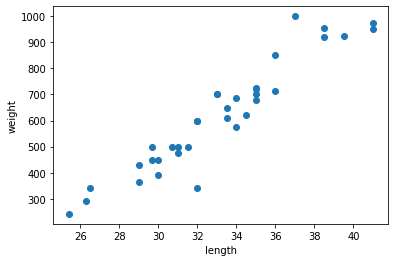

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight) 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

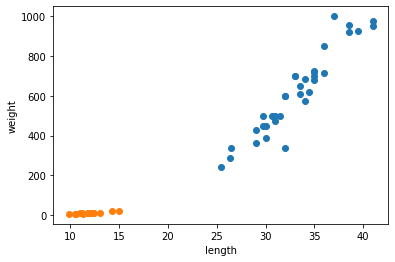

In [ ]:
plt.scatter(bream_length, bream_weight) 
plt.scatter(smelt_length, smelt_weight)  # 자동으로 색 구분 (주황:빙어)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 2) 첫 번째 머신러닝 프로그램 - k-최근접 이웃 알고리즘

*   데이터 2차원리스트 형태로 바꾸기  
*   kneighborsClassifier를 이용하여 훈련 및 평가





In [ ]:
length = bream_length + smelt_length  
weight = bream_weight+ smelt_weight

In [ ]:
fish_data = [[l,w] for l,w in zip(length,weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
fish_target = [1] * 35 +[0]*14
print(fish_target)
 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn = KNeighborsClassifier()

In [ ]:
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

## 3) k-최근접 이웃 알고리즘 더 자세히 살펴보기


*   사이킷런 KNeighborsClassifier의 fit_x , fit_y 속성에 저장된 데이터는 ?
*   참고 가능한 이웃의 기본값 바꾸기 - n_neighbors 매개변수를 활용
*   참고 데이터를 데이터 전체로 한다면 ...?! - 다수결의 원칙에 따르는 k-최근접 이웃 알고리즘




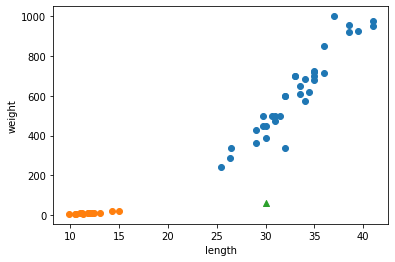

In [ ]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(30,60,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [ ]:
kn.predict([[30,600]])

NameError: ignored

In [ ]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data,fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [ ]:
print(35/49)

0.7142857142857143
